**AVIATION RISK ASSESMENT:DATA DRIVEN RECOMMENDATIONS FOR AIRCRAFT PURCHASES**

**AUTHOR:BEAUTTAH GRAHAM AKELLO**

My project focuses on evaluating the risks associated with different aircraft makes and models as part of my company’s planned entry into the aviation industry. By leveraging aviation accident data from the NTSB covering the years 1962–2023, I will analyze historical accident patterns, identify recurring safety concerns, and compare how different aircraft types perform over time. The goal is to highlight which aircraft have consistently demonstrated strong safety records and reliability, and which ones carry higher risks. These insights will provide the company with a data-driven foundation for deciding which aircraft to purchase for both commercial and private operations, ensuring a safer and more strategic entry into this new market.

**BUSINESS PROBLEM:**

My company is expanding into the aviation sector but lacks understanding about the safety risks associated with different aircraft models for both commercial and private operations. The key business question is to determine which aircraft models present the lowest risk, based on historical accident data.

Solving this problem will allow the company to make informed decisions in prioritizing low-risk aircraft purchases and strengthen its market entry strategy

**DATA UNDERSTANDING:**

The dataset used in this project comes from the National Transportation Safety Board (NTSB) and contains information about civil aviation accidents and selected incidents from 1962 to 2023. The data includes accidents and incidents within the United States and in international waters.

This data is directly relevant to the project's goal of assessing aviation risks, as it includes detailed information on past aviation accidents, including both the conditions and outcomes of accidents/incidents.
Each record in the dataset represents a specific aviation accident or incident. It includes variables related to the event, covering the event information, aircraft details, injury details and operational deatils.
Variable categories include:

**Event information:** Event.Id, Accident.Number, Event.Date, Location, Latitude, Longitude.

**Aircraft details:** Make, Model, Registration Number, Number of Engines, Engine Type, Aircraft.damage (e.g. Destroyed), Aircraft.Category, Amateur.Built (Yes/No) whether the aircraft was built by professionals or amateurs.

**Injury details:** Injury.Severity (e.g. Fatal(2), Fatal(3) with the number of fatalities in brackets), Total.Fatal Injuries, Total.Serious Injuries, Total.Minor Injuries, Total.Uninjured.

**Operational details:** Investigation.Type, Purpose.of.flight (e.g. Personal, Business), Broad.phase.of.flight (e.g. Cruise) - is the phase of flight when the accident occured, Report.Status (e.g. Probable Cause), Weather.Condition (i.e IMC - poor visibiliy conditions requiring flying priamrily by instruments, VMC - good visibility condtions, UNK-Unknown weather conditions during the accident ).

**DATA INSPECTION**

I will be importing data science packages:

In [54]:
#import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [55]:
#Loading of dataset into a dataframe
df = pd.read_csv("AviationData.csv" ,encoding="latin-1", low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [56]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [57]:
df.shape

(88889, 31)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [59]:
df.isna().sum() # Checking for missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [60]:
df.duplicated().value_counts()  #checking on duplicates

False    88889
dtype: int64

**DATA PREPARATION(CLEANING)**

From the inspection carried out  we can clearly see that  we have some missing values (NaN) and dupplicated rows
Now on this segment lets try  to clean this dataset so that we can carry analysis  and visualize it  so that we can draw insights from them 

Identifying and handling missing values.

In [61]:
# Lets look at the missing values again
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [62]:
df.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [63]:
a = df.shape

nan_percent = (df.isna().sum() / a[0])*100 # total percent of missing values per column
nan_percent

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category         63.677170
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
FAR.Description           63.974170
Schedule                  85.845268
Purpose.of.flight          6.965991
Air.carrier               81.271023
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5

In [64]:
nan_percent.sort_values(ascending=False) # Basically the .sort_values() to sort the percentages from largest to smallest

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.469946
Airport.Name              40.611324
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.961615
Report.Status              7.178616
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.481623
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Investigation.Type         0

**Schedule** and **Air.carrier** columns have the highest percentages at 85% and 81% respectively.

Let's have a look at some of the records that have values in those respective columns.

In [65]:
  #show rows that do not have missing values
df.loc[df['Schedule'].notna(),["Schedule"]] 

,Schedule
5,SCHD
22,NSCH
33,NSCH
39,SCHD
43,NSCH
...,...
88866,NSCH
88867,NSCH
88876,SCHD
88879,SCHD


In [66]:
#show rows that do not have missing values
df.loc[df["Air.carrier"].notna(),["Air.carrier"]]

,Air.carrier
5,Air Canada
22,"Rocky Mountain Helicopters, In"
33,Lang Air Service
39,Empire Airlines
43,Joel Frederick's Monarch Air
...,...
88877,GERBER RICHARD E
88879,HAWAIIAN AIRLINES INC
88880,Chandler Air Service
88881,Pilot


Judging from  this information we can see that this information  is largely unncessary since we are pushing our own aircraft and the schedules also if dropped they wont be necessary.
Futhermore, they are largely  having NaN values  so its pretty had working with them.

In [67]:
df.drop(["Air.carrier","Schedule"], axis=1,inplace=True)
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [68]:
df.shape

(88889, 29)

In [69]:
nan_percent.sort_values(ascending=False)

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.469946
Airport.Name              40.611324
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.961615
Report.Status              7.178616
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.481623
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Investigation.Type         0

Lets now look into the **Aircraft.Category** column and try to gain insights

In [70]:
df["Aircraft.Category"].value_counts() # Trying to understand the frequencies in this case 

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

I think the Aircraft Category is very very much important on this segment so we will impute the missing values with " Airplane"

In [71]:
df["Aircraft.Category"] .fillna("Airplane" , inplace=True)

In [72]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category             0
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: int64

Now lets also  look at **FAR.Description** 

In [73]:
df["FAR.Description"] .value_counts()

091                               18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                                 14
ARMF                                  8
Part 125: 20+ Pax,6000+ lbs           5
125                                   5
107                                   4


**FAR description** isnt that necessary in my case. I think the **Purpose of Flight** will serve a greater purpose in our analysis. 

In [74]:
df.drop("FAR.Description" , axis=1 ,inplace=True)


In [75]:
nan2_percent=(df.isna().sum())/ a[0]*100
nan2_percent

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category          0.000000
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
Purpose.of.flight          6.965991
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5.053494
Broad.phase.of.flight     30.560587
Report.Status              7.178616
Publication.Date          15

Now lets look at the **Broad.phase.of.flight** column

In [76]:
df["Broad.phase.of.flight"].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

This one is very important to help us understand where exactly planes tends to have accidents and where it is safe. So lets try  and keep it and impute the missing values with probably lets say **Landing**

In [77]:
df["Broad.phase.of.flight"].fillna("Landing" , inplace=True)

In [78]:
nan3_percent = (df.isna().sum()) / a[0]*100
nan3_percent

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Latitude                  61.320298
Longitude                 61.330423
Airport.Code              43.469946
Airport.Name              40.611324
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category          0.000000
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
Purpose.of.flight          6.965991
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5.053494
Broad.phase.of.flight      0.000000
Report.Status              7.178616
Publication.Date          15

For Latitude and Longitude columns, the geographical location of accidents may not provide insights as to which aircraft types are safest or most risky to operate and purchase.

The Publication.Date as well does not serve a purpose here since these reports can be published years after the accident.

Airport.Code is also not useful in this study and neither is Airport.Name. Aiport details will not provide relevant details.

These columns do not add much value to the study so I'll drop them.

In [79]:
df.drop(["Latitude","Longitude","Publication.Date","Airport.Code","Airport.Name"], axis=1 ,inplace=True)

In [80]:
nan4_percent = (df.isna().sum())/ a[0]*100
nan4_percent

Event.Id                   0.000000
Investigation.Type         0.000000
Accident.Number            0.000000
Event.Date                 0.000000
Location                   0.058500
Country                    0.254250
Injury.Severity            1.124999
Aircraft.damage            3.593246
Aircraft.Category          0.000000
Registration.Number        1.481623
Make                       0.070875
Model                      0.103500
Amateur.Built              0.114750
Number.of.Engines          6.844491
Engine.Type                7.961615
Purpose.of.flight          6.965991
Total.Fatal.Injuries      12.826109
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Uninjured            6.650992
Weather.Condition          5.053494
Broad.phase.of.flight      0.000000
Report.Status              7.178616
dtype: float64

In [81]:
#When it comes to this injuries lets just add zero  to the missing values
df[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries", "Total.Uninjured"]]= df[["Total.Fatal.Injuries","Total.Serious.Injuries","Total.Minor.Injuries", "Total.Uninjured"]].fillna(0)


In [82]:
nan5_percent = (df.isna().sum())/a[0]*100
nan5_percent

Event.Id                  0.000000
Investigation.Type        0.000000
Accident.Number           0.000000
Event.Date                0.000000
Location                  0.058500
Country                   0.254250
Injury.Severity           1.124999
Aircraft.damage           3.593246
Aircraft.Category         0.000000
Registration.Number       1.481623
Make                      0.070875
Model                     0.103500
Amateur.Built             0.114750
Number.of.Engines         6.844491
Engine.Type               7.961615
Purpose.of.flight         6.965991
Total.Fatal.Injuries      0.000000
Total.Serious.Injuries    0.000000
Total.Minor.Injuries      0.000000
Total.Uninjured           0.000000
Weather.Condition         5.053494
Broad.phase.of.flight     0.000000
Report.Status             7.178616
dtype: float64

As you can see we are close to having a clean dataset in this case almost everything is below 10 percent i can drop some rows with missing values and not loose alot of data.

In [83]:
df = df.dropna() # basically this is used to  create a new dataframe without missing values

In [84]:
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
dtype: int64

In [85]:
df.duplicated().sum()

0

In [86]:
df.shape

(74743, 23)

As  you can see the dataset is cleaning ;no duplicates and no duplicates.Now lets proceed to  Data modelling

**DATA MODELLING,ANYALYSIS AND VISUALIZATION**

So folks in these case here , we already have some clean data now the remaining part is to try and gain insights and ask relevant business questions in accordance to the business problem 

Lets try and work with the following questions;

1. Which aircraft makes are most frequently involved in accidents?
2. What levels of damage are sustained by different aircraft types?
3. What are the most common purposes of flights involved in accidents?
4. What are the fatality/injury distributions across aircraft makes and models?



Lets try geting down with the **first question**

Text(0, 0.5, 'Number Of Aircraft')

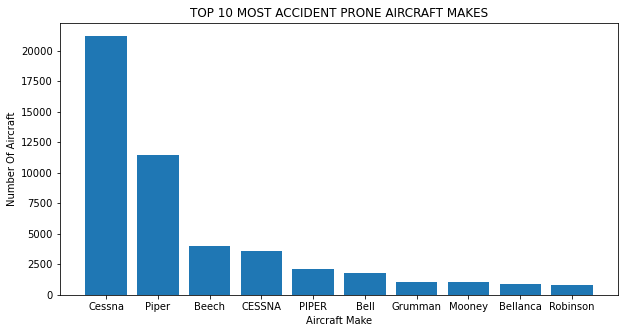

In [87]:
# Plot of the most common makes involved
top_10_aircraft_make = df["Make"].value_counts()[:10]


fig, ax = plt.subplots(figsize = (10,5))

ax.bar(top_10_aircraft_make.index, top_10_aircraft_make.values)
ax.set_title("TOP 10 MOST ACCIDENT PRONE AIRCRAFT MAKES")
ax.set_xlabel("Aircraft Make")
ax.set_ylabel("Number Of Aircraft")

This information visualized above its very good but if you try to take a closer look on this issue we can see that some Aircraft make are a bit redundant. A good example is the **Cessna** and **CESSNA**  and **Piper** and  **PIPER** so i think i will either make them lowercase or even uppercase

In [88]:
df.loc[:,'Make'] = df['Make'] .str.lower() #making all the Makes name lowercase(i have decided to work with lowercase)

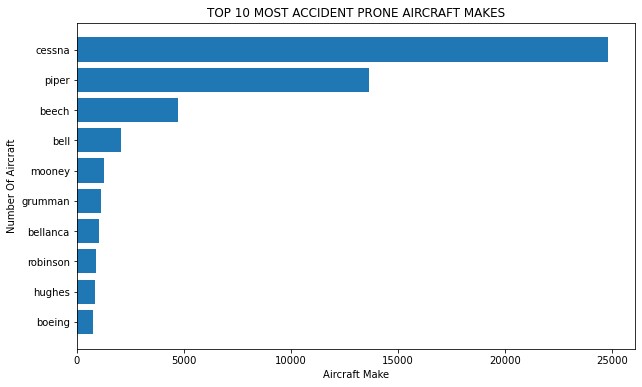

In [89]:
top_10_aircraft_make = df["Make"].value_counts()[:10].sort_values(ascending=True)


fig, ax = plt.subplots(figsize = (10,6))

ax.barh(top_10_aircraft_make.index, top_10_aircraft_make.values ) #My choice is horizontal bar graph 
ax.set_title("TOP 10 MOST ACCIDENT PRONE AIRCRAFT MAKES")
ax.set_xlabel("Aircraft Make")
ax.set_ylabel("Number Of Aircraft");

So from this visualization here we can clearly see Cessna Make tops the list on being the most unstable aircraft and also has the most accidents.

Now lets go to the second question which is:What levels of damage are sustained by different aircraft types?
Lets have a look And see if we can gain insights from it(We want to understand the durability of the planes)

Text(0, 0.5, 'Number of aircraft')

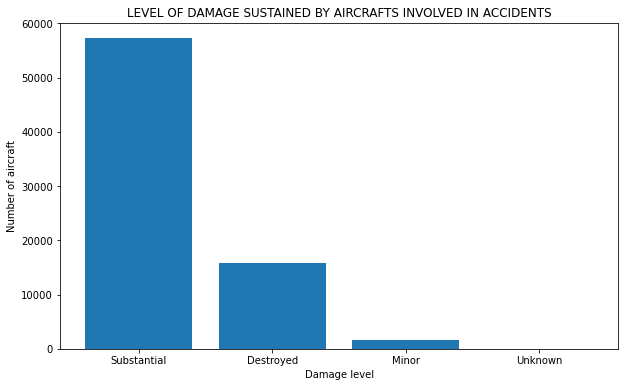

In [90]:
#plot of the different types of damages airplanes suffer after an accident
damage_level_counts = df["Aircraft.damage"].value_counts()


fig, ax = plt.subplots(figsize = (10,6))

ax.bar(damage_level_counts.index, damage_level_counts.values )
ax.set_title("LEVEL OF DAMAGE SUSTAINED BY AIRCRAFTS INVOLVED IN ACCIDENTS")
ax.set_xlabel("Damage level")
ax.set_ylabel("Number of aircraft")

As you can see most of the aircrafts experiences a substantial damage.

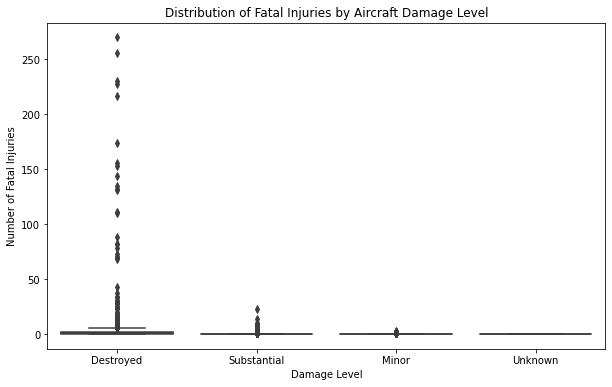

In [91]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Aircraft.damage", y="Total.Fatal.Injuries", data=df)

plt.title("Distribution of Fatal Injuries by Aircraft Damage Level")
plt.xlabel("Damage Level")
plt.ylabel("Number of Fatal Injuries")
plt.show()

In [92]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status'],
      dtype='object')

Now lets investigate whether the build has any effect on the durability

In [93]:
df['Amateur.Built'].value_counts()

No     66929
Yes     7814
Name: Amateur.Built, dtype: int64

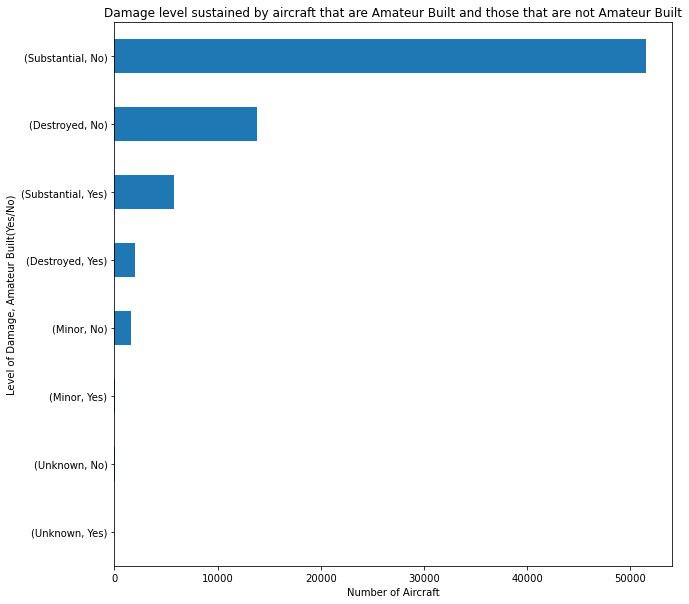

In [94]:
build_type = df.groupby(['Aircraft.damage','Amateur.Built']) .size().sort_values(ascending=True)
ax = build_type.plot(kind="barh", figsize=(10,10)) #this makes it horizontal
ax.set_title("Damage level sustained by aircraft that are Amateur Built and those that are not Amateur Built")
ax.set_ylabel("Level of Damage, Amateur Built(Yes/No)")
ax.set_xlabel("Number of Aircraft");

Given the disproportionate numbers between amateur built and not amateur built aircrat in the dataset, It appears that aircraft that are amateur build sustain substantial damage or are destroyed.

Now on to the final question: What are the most common purposes of flights involved in accidents?

My company wants to venture into the commercial and private side of the aviation business. So it is important to know the risks associated with each purpose of a flight, if any.

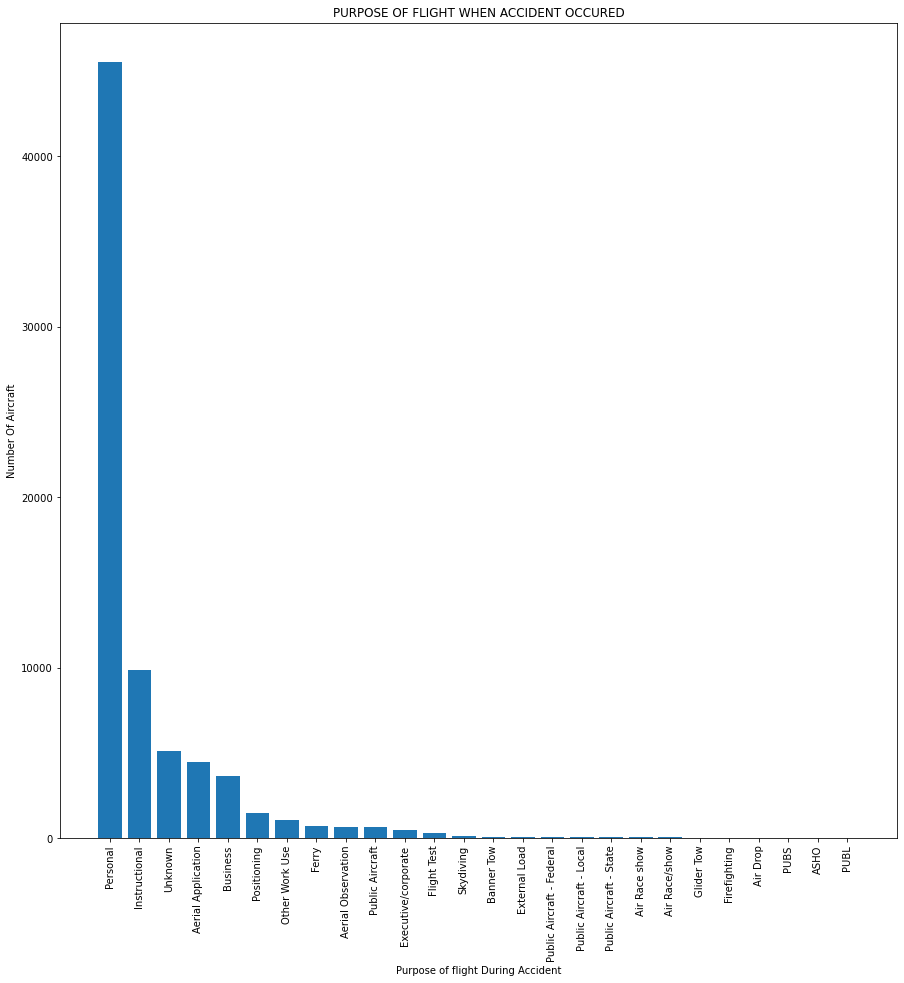

In [95]:
#plot of purpose of flight when accident/incident occured
purpose_counts = df["Purpose.of.flight"].value_counts()

fig, ax = plt.subplots(figsize = (15,15))

ax.bar(purpose_counts.index, purpose_counts.values )
ax.set_title("PURPOSE OF FLIGHT WHEN ACCIDENT OCCURED")
ax.set_xlabel("Purpose of flight During Accident")
ax.set_ylabel("Number Of Aircraft")
ax.set_xticks(range(len(purpose_counts.index)))
ax.set_xticklabels(purpose_counts.index,rotation=90);